# 使用Keras序贯模型API进行结构化数据分类
序贯模型优势（sequential）：简单易操作，不需要对神经元进行复杂的定义及架构网络。能够通过序贯模型API中定义好的网络层线性进行堆叠构建模型。

## 构建模拟数据集

In [1]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
import keras

X, y = make_blobs(n_samples=1000, # 1000个样本
                 n_features=20, # 每个样本20个特征
                 centers=3, # 3个中心
                 random_state=21 #控制随机性
                 )

print("X特征数据的部分示例为：\n", X[:1])
print("y标签数据的部分示例为：\n", y[:10])

# 将y进行哑编码
y = keras.utils.to_categorical(y, num_classes=3)

print("哑编码后的y标签特征为：\n", y[:10])

# 拆分训练集测试集
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=21)

Using TensorFlow backend.
/Users/slyfox/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/slyfox/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/slyfox/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/slyfox/opt/anaconda3/lib/python3.7

X特征数据的部分示例为：
 [[-8.58670037e-01  5.42011374e+00 -4.48922577e+00  6.63658152e+00
   7.50453954e+00  5.09286743e+00  5.71528089e-01 -6.93762039e+00
  -4.71649961e+00 -3.27139157e+00 -1.82521943e+00  6.96716951e-01
  -1.08094614e-03 -6.11410991e+00  6.66636944e+00  5.72958155e+00
   6.69346435e+00 -4.18317262e+00  2.20232743e+00  3.08481356e+00]]
y标签数据的部分示例为：
 [1 0 1 1 0 2 1 2 2 1]
哑编码后的y标签特征为：
 [[0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]]


### 使用全连接构建神经网络

In [2]:
from keras.models import Sequential
from keras.layers import Dense, Activation

model = Sequential()
model.add(Dense(10, input_shape=(20,)))
model.add(Activation('relu'))
model.add(Dense(units=3))
model.add(Activation("softmax"))

Instructions for updating:
Colocations handled automatically by placer.


### 编译模型

在训练模型之前，我们需要通过compile来对学习过程进行配置。compile接收三个参数：

- **优化器optimizer**：该参数可指定为已预定义的优化器名，如rmsprop、adagrad，或一个Optimizer类的对象，详情见[optimizers](https://keras.io/zh/optimizers/)
- **损失函数loss**：该参数为模型试图最小化的目标函数，它可为预定义的损失函数名，如categorical_crossentropy、mse，也可以为一个损失函数。详情见[losses](https://keras.io/zh/losses/)
- **指标列表metrics**：对分类问题，我们一般将该列表设置为metrics=['accuracy']。指标可以是一个预定义指标的名字,也可以是一个用户定制的函数.指标函数应该返回单个张量,或一个完成metric_name - > metric_value映射的字典.请参考[性能评估](https://keras.io/zh/metrics/)

在面对不同分类问题，如二分类、多分类、回归问题时，优化其与损失函数需要进行调整

In [3]:
# 多分类问题
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

### 查看构建的模型网络

In [4]:
# 查看模型结构
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                210       
_________________________________________________________________
activation_1 (Activation)    (None, 10)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 33        
_________________________________________________________________
activation_2 (Activation)    (None, 3)                 0         
Total params: 243
Trainable params: 243
Non-trainable params: 0
_________________________________________________________________


### 训练模型
如果可以一次性读入数据，可以采用fit函数，如果数据量很大，需要用到fit_generator

In [5]:
network_history = model.fit(X_train, y_train, epochs=5, batch_size=32, verbose=1)

Instructions for updating:
Use tf.cast instead.
Epoch 1/5
800/800 [==============================] - 0s 162us/step - loss: 2.8443 - accuracy: 0.6375
Epoch 2/5
800/800 [==============================] - 0s 42us/step - loss: 0.8330 - accuracy: 0.7287
Epoch 3/5
800/800 [==============================] - 0s 44us/step - loss: 0.0742 - accuracy: 0.9825
Epoch 4/5
800/800 [==============================] - 0s 43us/step - loss: 0.0134 - accuracy: 1.0000
Epoch 5/5
800/800 [==============================] - 0s 37us/step - loss: 0.0035 - accuracy: 1.0000


### 可视化训练信息

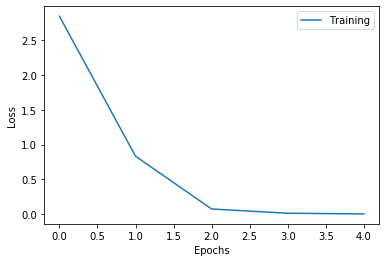

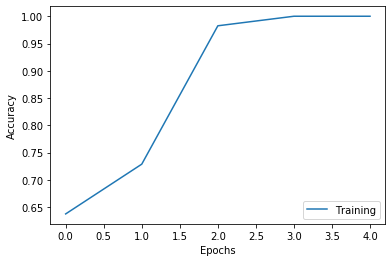

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_history(network_history):
    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.plot(network_history.history['loss'])
    plt.legend(['Training'])

    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.plot(network_history.history['accuracy'])
    plt.legend(['Training'], loc='lower right')
    plt.show()

plot_history(network_history)

In [7]:
loss_and_metrics = model.evaluate(X_test, y_test, batch_size=128)

200/200 [==============================] - 0s 214us/step


In [8]:
classes = model.predict(X_test, batch_size=128)

print("最终的损失和准确率为：\n", loss_and_metrics)
print("模型预测测试集合X所属标签为：\n", classes[:5])

最终的损失和准确率为：
 [0.0016560047678649426, 1.0]
模型预测测试集合X所属标签为：
 [[9.9631017e-01 3.6898509e-03 1.7257001e-08]
 [9.3188164e-06 9.9999058e-01 8.1176267e-08]
 [1.0980148e-05 9.9998903e-01 2.9924902e-08]
 [1.7962944e-05 9.9998164e-01 3.1600175e-07]
 [1.0123017e-03 1.6744294e-04 9.9882025e-01]]


### 模型存储与加载

In [12]:
# 模型的存储
pm = "./practice_model.h5"
model.save(pm)
print("Model saved!")

Model saved!


In [19]:
# 加载存储的模型开始预测
from keras.models import load_model

print("Loading model...")
load_model = load_model("./practice_model.h5")

# 使用测试集中的第一条开始预测
print("Using loaded model to predict...")
predicted = load_model.predict(X_test[:1])

# 呈现预测结果
print("预测结果为：\n", predicted)

Loading model...
Using loaded model to predict...
[[-10.17210708  -3.58922416   5.17417356  -9.5574506   -7.87330204
   -8.09135139  -4.01403668   2.48937621  -4.37548755   1.66324393
   -8.57891609   7.99868972  -6.71565823  -6.72988981   0.24867309
    8.91876749   5.02343558   7.98951665   7.16450934  -3.60671097]]
预测结果为：
 [[9.9631017e-01 3.6898509e-03 1.7257001e-08]]
